In [33]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()
 
# Make a copy to avoid the warning
# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
# One-hot encode categorical columns
X = pd.get_dummies(df_filtered.drop(['species', 'class_encoded'], axis=1), drop_first=True)



       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [34]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)  

#Train the logistic regression model. Here we are using saga solver to learn weights.
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)
 
# Predict on the testing data
y_pred = logreg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Before Scaling Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Before Scaling Accuracy: 0.5813953488372093
[[ 2.74776736e-03 -8.22524456e-05  4.56493544e-04 -2.86152959e-04
   1.84490238e-04 -1.04470246e-04  1.07508517e-05]] [-8.47312169e-06]


c:\Users\hansa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [35]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

#Train the logistic regression model. Here we are using saga solver to learn weights.

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 1.0
[[ 1.4972774  -1.3855492  -0.14189846 -0.00358871  0.72189036 -0.55196997
  -0.22201155]] [-0.07582589]


In [36]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2, random_state=42)

#Train the logistic regression model. Here we are using saga solver to learn weights.

logreg = LogisticRegression(solver='saga', max_iter= 5000)
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("After Scaling Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

After Scaling Accuracy: 1.0
[[ 3.37663618 -0.46190133  0.44934454 -0.3557544   1.11809155 -0.51739876
  -0.91910235]] [-2.31940887]


In [37]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2, random_state=42)

#Train the logistic regression model. Here we are using saga solver to learn weights.

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("After Scaling Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

After Scaling Accuracy: 1.0
[[ 3.33030587 -0.40495534  0.40514432 -0.35033528  0.90692927 -0.38466445
  -0.86005344]] [-1.81042125]


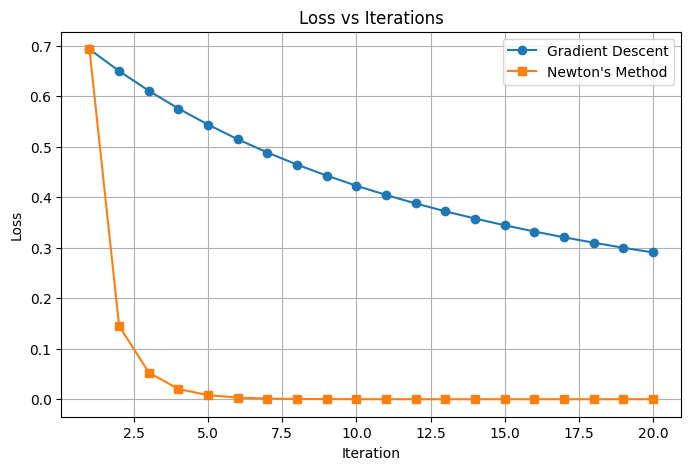

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic dataset
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# -------------------------
# Batch Gradient Descent
# -------------------------
# Xavier initialization for weights
# rng = np.random.RandomState(0)  # reproducibility
# n_features = X.shape[1]
# w_gd = rng.randn(n_features) * np.sqrt(1.0 / n_features) # Xavier normal initialization

w_gd = np.zeros(X.shape[1])
# Bias can still be initialized to 0

b_gd = 0
lr = 0.01
n_iter = 20
loss_gd = []

for i in range(n_iter):
    z = np.dot(X, w_gd) + b_gd
    y_hat = sigmoid(z)
    
    dw = np.dot(X.T, (y_hat - y)) / X.shape[0]
    db = np.sum(y_hat - y) / X.shape[0]
    
    w_gd -= lr * dw
    b_gd -= lr * db
    
    loss = -np.mean(y * np.log(y_hat + 1e-9) + (1-y) * np.log(1 - y_hat + 1e-9))
    loss_gd.append(loss)

# -------------------------
# Newton's Method
# -------------------------
X_bias = np.hstack((X, np.ones((X.shape[0], 1))))  # Add bias column
w_newton = np.zeros(X_bias.shape[1])
loss_newton = []

for i in range(n_iter):
    z = np.dot(X_bias, w_newton)
    y_hat = sigmoid(z)
    
    grad = np.dot(X_bias.T, (y_hat - y)) / X.shape[0]
    R = np.diag(y_hat * (1 - y_hat))
    H = np.dot(X_bias.T, np.dot(R, X_bias)) / X.shape[0]
    
    w_newton -= np.linalg.inv(H).dot(grad)
    
    loss = -np.mean(y * np.log(y_hat + 1e-9) + (1-y) * np.log(1 - y_hat + 1e-9))
    loss_newton.append(loss)

# -------------------------
# Plotting
# -------------------------
plt.figure(figsize=(8,5))
plt.plot(range(1, n_iter+1), loss_gd, marker='o', label='Gradient Descent')
plt.plot(range(1, n_iter+1), loss_newton, marker='s', label="Newton's Method")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.legend()
plt.grid(True)
plt.show()


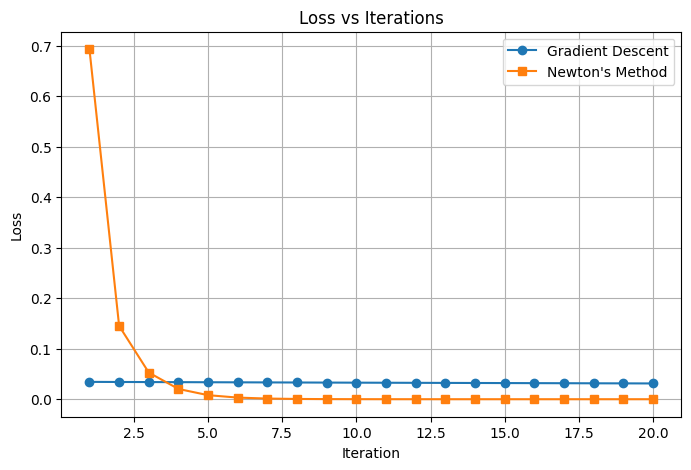

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic dataset
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# -------------------------
# Batch Gradient Descent
# -------------------------
# Xavier initialization for weights
rng = np.random.RandomState(0)  # reproducibility
n_features = X.shape[1]
w_gd = rng.randn(n_features) * np.sqrt(1.0 / n_features) # Xavier normal initialization

#w_gd = np.zeros(X.shape[1])
# Bias can still be initialized to 0

b_gd = 0
lr = 0.01
n_iter = 20
loss_gd = []

for i in range(n_iter):
    z = np.dot(X, w_gd) + b_gd
    y_hat = sigmoid(z)
    
    dw = np.dot(X.T, (y_hat - y)) / X.shape[0]
    db = np.sum(y_hat - y) / X.shape[0]
    
    w_gd -= lr * dw
    b_gd -= lr * db
    
    loss = -np.mean(y * np.log(y_hat + 1e-9) + (1-y) * np.log(1 - y_hat + 1e-9))
    loss_gd.append(loss)

# -------------------------
# Newton's Method
# -------------------------
X_bias = np.hstack((X, np.ones((X.shape[0], 1))))  # Add bias column
w_newton = np.zeros(X_bias.shape[1])
loss_newton = []

for i in range(n_iter):
    z = np.dot(X_bias, w_newton)
    y_hat = sigmoid(z)
    
    grad = np.dot(X_bias.T, (y_hat - y)) / X.shape[0]
    R = np.diag(y_hat * (1 - y_hat))
    H = np.dot(X_bias.T, np.dot(R, X_bias)) / X.shape[0]
    
    w_newton -= np.linalg.inv(H).dot(grad)
    
    loss = -np.mean(y * np.log(y_hat + 1e-9) + (1-y) * np.log(1 - y_hat + 1e-9))
    loss_newton.append(loss)

# -------------------------
# Plotting
# -------------------------
plt.figure(figsize=(8,5))
plt.plot(range(1, n_iter+1), loss_gd, marker='o', label='Gradient Descent')
plt.plot(range(1, n_iter+1), loss_newton, marker='s', label="Newton's Method")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.legend()
plt.grid(True)
plt.show()


Condition number of X^T X / m: 1.1625704823817131


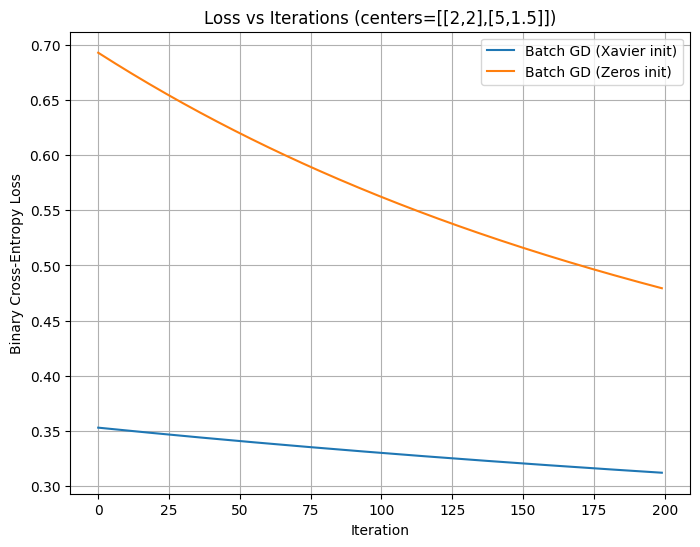

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate data with new centers
np.random.seed(0)
centers = [[2, 2], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = np.array([[0.5, 0.5], [-0.5, 1.5]])
X = X.dot(transformation)

# Standardize features (recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

m, d = X_scaled.shape

# Diagnostic: condition number of covariance matrix
cov = (X_scaled.T @ X_scaled) / m
cond_number = np.linalg.cond(cov)
print("Condition number of X^T X / m:", cond_number)

# Batch GD settings
lr = 0.01
n_iter = 200
eps = 1e-9

def run_batch_gd(X, y, init='xavier', lr=0.01, n_iter=200):
    rng = np.random.RandomState(0)
    if init == 'xavier':
        w = rng.randn(X.shape[1]) * np.sqrt(1.0 / X.shape[1])
        b = 0.0
    elif init == 'zeros':
        w = np.zeros(X.shape[1])
        b = 0.0
    else:
        raise ValueError("init must be 'xavier' or 'zeros'")

    loss_hist = []
    for i in range(n_iter):
        z = X.dot(w) + b
        y_hat = sigmoid(z)
        dw = (X.T @ (y_hat - y)) / m
        db = np.sum(y_hat - y) / m

        w -= lr * dw
        b -= lr * db

        loss = -np.mean(y * np.log(y_hat + eps) + (1-y) * np.log(1 - y_hat + eps))
        loss_hist.append(loss)
    return w, b, loss_hist

# Run with Xavier init
w_x, b_x, loss_x = run_batch_gd(X_scaled, y, init='xavier', lr=lr, n_iter=n_iter)

# Run with zeros init
w_z, b_z, loss_z = run_batch_gd(X_scaled, y, init='zeros', lr=lr, n_iter=n_iter)

# Plot losses
plt.figure(figsize=(8,6))
plt.plot(loss_x, label='Batch GD (Xavier init)')
plt.plot(loss_z, label='Batch GD (Zeros init)')
plt.xlabel('Iteration')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Loss vs Iterations (centers=[[2,2],[5,1.5]])')
plt.legend()
plt.grid(True)
plt.show()
